In [1]:
from qiskit import *

In [2]:
qr = QuantumRegister(3)

In [3]:
cr = ClassicalRegister(3)

In [4]:
circ = QuantumCircuit(qr,cr)

In [5]:
circ.h(0)

In [6]:
circ.h(1)

In [7]:
circ.cx(0,1)

In [8]:
circ.cx(1,2)

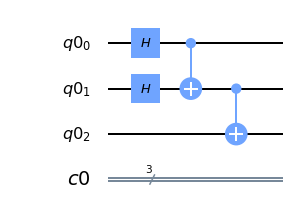

In [9]:
circ.draw(output='mpl')

In [11]:
circ.measure([0,1,2],[0,1,2])

In [12]:
circ.draw()

┌───┐          ┌─┐      
q0_0: ┤ H ├──■───────┤M├──────
      ├───┤┌─┴─┐     └╥┘┌─┐   
q0_1: ┤ H ├┤ X ├──■───╫─┤M├───
      └───┘└───┘┌─┴─┐ ║ └╥┘┌─┐
q0_2: ──────────┤ X ├─╫──╫─┤M├
                └───┘ ║  ║ └╥┘
c0_0: ════════════════╩══╬══╬═
                         ║  ║ 
c0_1: ═══════════════════╩══╬═
                            ║ 
c0_2: ══════════════════════╩═

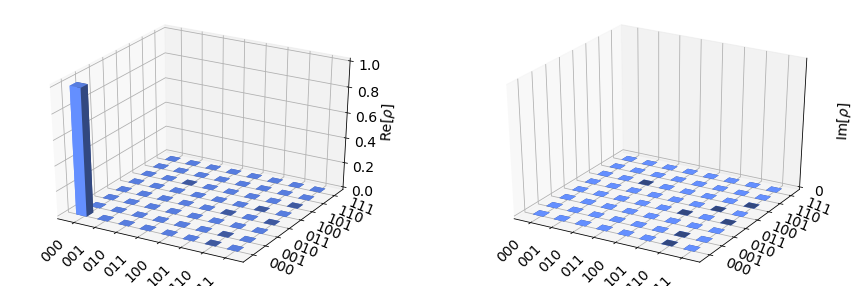

In [14]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circ,simulator).result()
stvctr = result.get_statevector(circ)
from qiskit.tools.visualization import plot_state_city, plot_histogram
plot_state_city(stvctr)

{'001': 256, '111': 264, '110': 249, '000': 255}


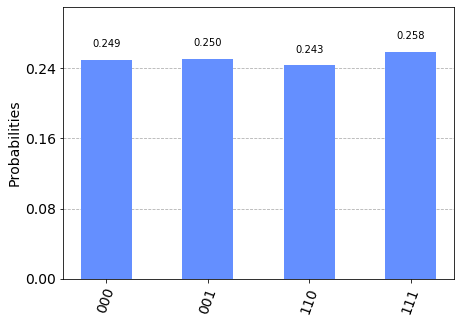

In [15]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circ,simulator).result()
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts)

In [16]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
provider = IBMQ.get_provider('ibm-q')

In [18]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [19]:
from qiskit.tools.monitor import job_monitor

In [21]:
job = execute(circ,qcomp)

In [22]:
job_monitor(job)

Job Status: job has successfully run


In [23]:
result = job.result()

{'101': 19, '001': 234, '100': 26, '011': 22, '110': 208, '111': 212, '010': 17, '000': 286}


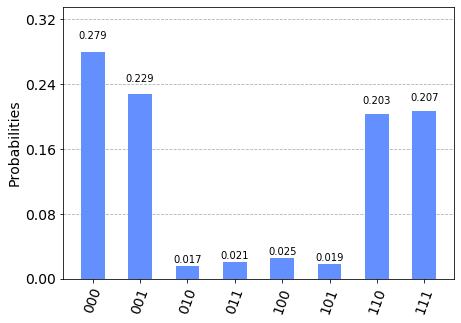

In [24]:
counts = result.get_counts(circ)
print(counts)
plot_histogram(counts)